In [2]:
import pandas as pd
import numpy as np

In [6]:
iris = pd.read_csv('module06/iris.data', sep=',',
                   header=None, # the data file does not contain a header
                   names=['sepal length','sepal width','petal length','petal width','class'])

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Measures of location

A measure of **location**, or *a measure of center*, where the values are mostly located. This measure includes: mean, median, mode.

**Median** is the middle value in a sorted list of values. Median splits the data in the "middle" so that 50% of the data points are above this point and 50% - below.

Let's use the same simple dataset above. To get the median, first, sort the list of values: 

`12 15 16 21 21 22`

In the "middle" of this dataset there are two values, `16` and `21`. If there is an even number of values in the middle of the sorted list, we need to calculate an average of these values. Hence, the median value for this dataset is: 

`(16 + 21) / 2 = 18.5`

In [9]:
# grouping data by class
iris_grouped = iris.groupby('class')

# calculating mean (average) for each class:
iris_grouped.mean()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [11]:
# calculating median for each class:
iris_grouped.median()

# We can see that in our example, the mean and the median values for all of the iris classes are very close to each other. This means that the data is evenly divided and distributed around the mean.

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


# Measures of spread

A measure of **spread**, or *statistical dispersion*. This measure includes: standard deviation, variance, range, interquartile range. 

- **Variance** is a measure of the variability in the data, it measures how far values are spread out from the mean. Variance is roughly the average squared distance from the mean.

- **Standard deviation** is the square root of the variance and can be used to describe how close the typical data point is to the mean. 

In [12]:
# Variance:
iris_grouped.var()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


In [13]:
# Standard deviation:
iris_grouped.std()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


Frequency distribution

In [15]:
houses = pd.DataFrame({
    'price, thousands': [200,300,400,500,600,700,800,900,1000],
    'num of houses': [2,10,15,25,30,25,15,10,2]})

houses.head()

,"price, thousands",num of houses
0,200,2
1,300,10
2,400,15
3,500,25
4,600,30


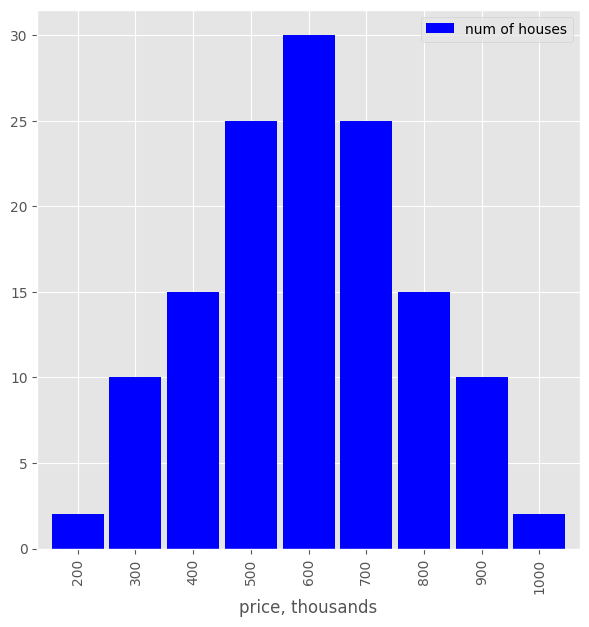

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
# plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (7,7)

houses.plot(x= 'price, thousands', y='num of houses', kind='bar', color='blue', width=0.9)

plt.show()

# You can see from the plot that the distribution appears to be symmetric and bell-shaped. This is an example of what we call a normal distribution. Half of the data will fall to the left of the mean; half will fall to the right. Mean and median values for normally distributed data should be roughly the same.

In [18]:
houses['num of houses'].mean()

14.88888888888889

In [20]:
houses['num of houses'].median()

15.0

In [21]:
houses['num of houses'].std()

10.080233683358292

Normal distribution of random numbers

Let's create a normal distribution of random numbers and plot a histogram of this sequence. We will use the function `randn()` from the `numpy.random` library which will create an array of random normally distributed floating point numbers.

The array created using this function will have mean 0 and variance 1. The normal distribution with mean 0 and standard deviation 1 is called the **standard normal distribution**. 

Based on this standard normal distribution, we are going to create another array of random normally distributed floating point numbers, `x`, with the `mean = 100` and `standard deviation = 15`. Then we will create a histogram with 50 bins and plot it.

**NOTE:** We chose 50 bins for this example, but this is not an ideal or required number. You might want to experiment and change this number later.

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
C:\Users\meddi\AppData\Local\Temp\ipykernel_16020\3259035559.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=15$")


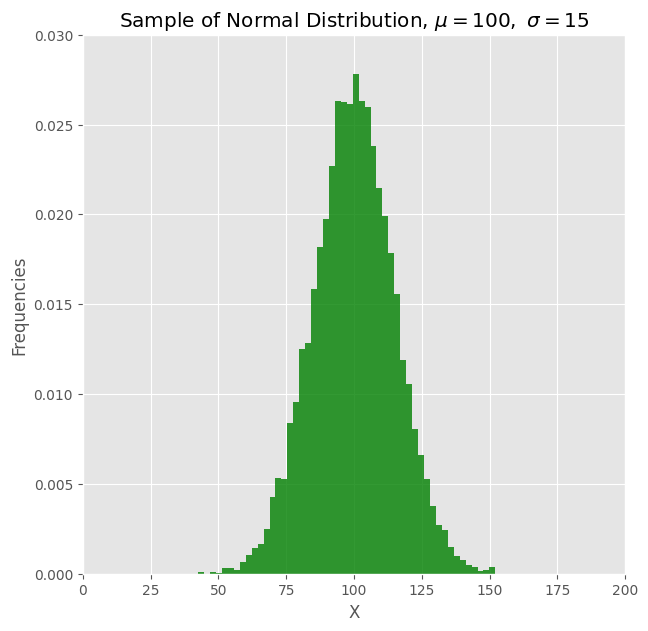

In [25]:
mu = 100  # mean of distribution
sigma = 15 # standard deviation of distribution

# Creating an array of 10,000 random numbers with 0 mean and St Dev of 1
# x is a random variable with mean value of 'mu' and St Dev of 'sigma'
x = mu + sigma * np.random.randn(10000) #qn: Why add and multiply? What's this formula

num_bins = 50  # number of bins to create

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor= 'green', alpha=0.8)
plt.xlabel('X')
plt.axis([0, 200, 0, 0.03])
plt.ylabel('Frequencies')
plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=15$")
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\meddi\AppData\Local\Temp\ipykernel_16020\1443322077.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=30$")


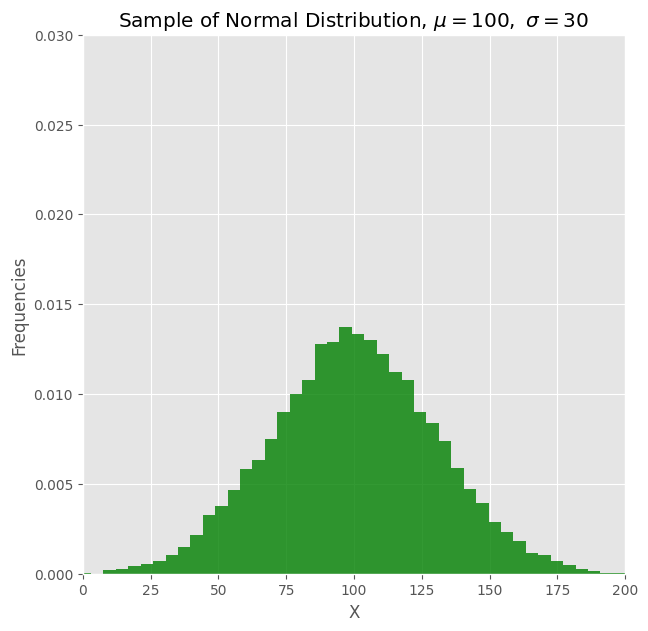

In [26]:
# Let's take the histogram above and change only one parameter, standard deviation, from 15 to 30. We will copy the code from above and make the change:
mu = 100 
sigma = 30     # changed standard deviation from 15 to 30

x = mu + sigma * np.random.randn(10000)

num_bins = 50   # number of bins to create
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.8)
plt.xlabel('X')
plt.axis([0, 200, 0, 0.03])
plt.ylabel('Frequencies')
plt.title("Sample of Normal Distribution, " + "$\mu=100,\ \sigma=30$")
plt.show()

# You can see that the distribution is much wider than the previous one, which indicates more variability in the data. There is a wider range of values within the data and some data points are farther away from the mean.

# Measures of shape

In [27]:
iris_grouped.skew()

# As you can see from the table above, data for the Iris-setosa class of iris flower is right skewed (positive skew) for all four parameters we are analyzing here, the data for Iris-versicolor is mostly left skewed (negative skew), and the data for Iris-virginica is mostly right skewed with petal width data being left skewed. We will discuss the significance of this measure in the next course of the program.

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


# Correlation

In pandas, the correlation coefficient is calculated using corr() function. However, keep in mind that this function won't work on a grouped object. For example, we can calculate the correlation between sepal length and petal length in the iris data, across all classes of the flower.

In [28]:
# In pandas, the correlation coefficient is calculated using corr() function. However, keep in mind that this function won't work on a grouped object. For example, we can calculate the correlation between sepal length and petal length in the iris data, across all classes of the flower.

iris['sepal length'].corr(iris['petal length'])

# We can see from the number above that there is a pretty strong correlation between sepal and petal length across all three classes of flowers.

0.8717541573048712

## Correlation for grouped data

In [31]:
# Approach #1: 
# Use the corrwith() function which allows us to calculate pairwise correlation between the columns of two DataFrame objects:
correlations = (iris[['sepal length', 'class']]
                .groupby('class')
                .corrwith(iris['petal length'])
                .rename(columns={'sepal length': 'Corr Coef'})) #qn: Why ( )? To mean same line?

correlations

,Corr Coef
class,
Iris-setosa,0.263874
Iris-versicolor,0.754049
Iris-virginica,0.864225


In [32]:
correlations = iris[['sepal length', 'class']].groupby('class').corrwith(iris['petal length']).rename(columns={'sepal length' : 'Corr Coef'})

correlations

,Corr Coef
class,
Iris-setosa,0.263874
Iris-versicolor,0.754049
Iris-virginica,0.864225


In [33]:
# Approach #2: Use apply() and lambda on the groupBy object:

iris_grouped.apply(lambda iris_grouped: iris_grouped['sepal length'].corr(iris_grouped['petal length']))

C:\Users\meddi\AppData\Local\Temp\ipykernel_16020\112407632.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  iris_grouped.apply(lambda iris_grouped: iris_grouped['sepal length'].corr(iris_grouped['petal length']))


class
Iris-setosa        0.263874
Iris-versicolor    0.754049
Iris-virginica     0.864225
dtype: float64

In [ ]:
# As you can see, we cannot rely on the generalized calculation across multiple classes of the flowers. The correlation between sepal and petal lengths is quite strong for versicolor (R = 0.75) and virginica (R = 0.86) flowers, but is weak for setosa flowers with R = 0.26.

# Summary Statistics in Pandas

Pandas has a very useful function, describe(), which calculates multiple measures and displays then in a table format. 

In [34]:
data_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

# Download the data
red_wine_data = pd.read_csv(data_url, header=0, sep=";")

red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
red_wine_data.describe()

# describe() also shows lower (25%), 50 (50%) and upper (75%) percentiles. 
# The 50 percentile is the same as the median.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
# it seems that there are no null values because the counts for all attributes are equal to 1,599. 
# We can validate this assumption:
red_wine_data.isnull().values.any()

False

we can calculate individual values for single columns. 

In [45]:
red_wine_data.density.mean()

0.9967466791744841

In [46]:
red_wine_data.density.std()

0.0018873339538425554

In [ ]:
# This data set contains attributes that are on different scales. 
#To normalize the data so all attributes (columns) are on the same scale, we can scale each column so that the mean becomes zero and the data is in units of standard deviation.

In [47]:
# Standard Score

normalized_red_wine_data = (red_wine_data - red_wine_data.mean()) / red_wine_data.std() 
normalized_red_wine_data[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [48]:
# Now we can calculate correlations for all attributes within the DataFrame:
normalized_red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
